# Voraussetzung: Packages installieren

In [25]:
%pip install -r req_LogRegr.txt

Note: you may need to restart the kernel to use updated packages.


# 1. Bibliotheken importieren

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# 2. Datensatz laden

In [27]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")  

# 3. Erste Erkundung

In [28]:
print("🧾 Datenübersicht:")
print(df.head())
print(df.info())

🧾 Datenübersicht:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies   

# 4. Datenbereinigung

In [29]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.dropna(inplace=True)
df.drop("customerID", axis=1, inplace=True)

# 5. Kategorische Daten codieren

In [30]:
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. Kategorische Daten codieren

In [31]:
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = l

# 6. Features und Zielvariable trennen

In [32]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

# 7. Trainings- und Testdaten aufteilen

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Skalieren der Features

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 9. Modell trainieren: Logistische Regression

In [35]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

# 10. Vorhersagen treffen

In [36]:
y_pred = logreg.predict(X_test_scaled)

# 11. Modellbewertung

In [37]:
print("\n📊 Modellbewertung:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\n🔍 Klassifikationsbericht:")
print(classification_report(y_test, y_pred))


📊 Modellbewertung:
Accuracy: 0.7853589196872779
Precision: 0.6208053691275168
Recall: 0.4946524064171123
F1-Score: 0.5505952380952381

🔍 Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



# 12. Konfusionsmatrix visualisieren

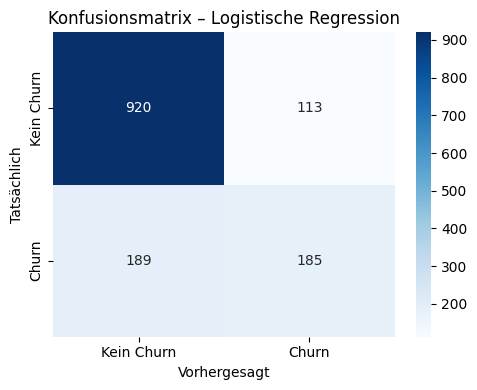

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Kein Churn", "Churn"], yticklabels=["Kein Churn", "Churn"])
plt.ylabel("Tatsächlich")
plt.xlabel("Vorhergesagt")
plt.title("Konfusionsmatrix – Logistische Regression")
plt.tight_layout()
plt.show()

# 13. Modellinterpretation: Einfluss der Features

In [39]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Koeffizient": logreg.coef_[0]
})
coeff_df["Einfluss"] = coeff_df["Koeffizient"].apply(lambda x: "↑" if x > 0 else "↓")
coeff_df = coeff_df.sort_values(by="Koeffizient", ascending=False)

print("\n📈 Wichtigste Einflussfaktoren:")
print(coeff_df.head(10))


📈 Wichtigste Einflussfaktoren:
             Feature  Koeffizient Einfluss
17    MonthlyCharges     0.703291        ↑
18      TotalCharges     0.663135        ↑
7    InternetService     0.189142        ↑
15  PaperlessBilling     0.147641        ↑
1      SeniorCitizen     0.103191        ↑
6      MultipleLines     0.056968        ↑
16     PaymentMethod     0.045165        ↑
2            Partner     0.032594        ↑
13   StreamingMovies     0.015859        ↑
12       StreamingTV     0.011702        ↑
